In [1]:
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
os.chdir(r"/content/drive/My Drive/NN98/HW5")

In [3]:
#delete directory logs and image model
!rm -rf "/content/drive/My Drive/NN98/HW5/logs"
!rm -rf "/content/drive/My Drive/NN98/HW5/model.png"

os.mkdir("./logs")

FileNotFoundError: ignored

In [3]:
os.listdir()

['snli_1.0',
 '__MACOSX',
 'snli_1.0.zip',
 'acc.pkl',
 'val_acc.pkl',
 'model1.h5',
 'logs',
 'loss.pkl',
 'val_loss.pkl',
 'model2.h5']

In [4]:
import pandas as pd

In [5]:
train_data = pd.read_csv("./snli_1.0/snli_1.0_train.txt", delimiter="\t")

In [6]:
#train_data

In [7]:
test_data = pd.read_csv("./snli_1.0/snli_1.0_test.txt", delimiter="\t")
validation_data = pd.read_csv("./snli_1.0/snli_1.0_dev.txt", delimiter="\t")

In [8]:
print("train shape : ", train_data.shape, "test shape : ", test_data.shape, "validation shape : ", validation_data.shape)

train shape :  (550152, 14) test shape :  (10000, 14) validation shape :  (10000, 14)


In [9]:
total_sentences = train_data.shape[0] + test_data.shape[0] + validation_data.shape[0]
print("total senteces : ", total_sentences)

total senteces :  570152


In [10]:
import numpy as np

In [11]:
train_df = train_data.loc[train_data["gold_label"] == "entailment"]

In [12]:
test_df = test_data.loc[test_data["gold_label"] == "entailment"]

In [13]:
validation_df = validation_data.loc[validation_data["gold_label"] == "entailment"]

In [14]:
print("train shape : ", train_df.shape, "test shape : ", test_df.shape, "validation shape : ", validation_df.shape)

train shape :  (183416, 14) test shape :  (3368, 14) validation shape :  (3329, 14)


In [15]:
#train_df

In [16]:
train_df = train_df[train_df["sentence2"].notnull()]

In [17]:
Xtrain = np.array(train_df["sentence1"])
Ytrain = np.array(train_df["sentence2"])
print("X train shape : ", Xtrain.shape, "Y train shape : ", Ytrain.shape)

X train shape :  (183414,) Y train shape :  (183414,)


In [18]:
dicts = {}
for i,sentece in enumerate(Ytrain):
    dicts[i] = [int(st) for st in Ytrain[i].split() if st.isdigit()]

In [19]:
import unicodedata
import re

In [20]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


In [21]:
def preproces_sentences(text):
    text = text.lower().strip()
    #text = '<start> ' + text + ' <end>'
    return text                     


In [22]:
test_X_train = preproces_sentences(Xtrain[0])
test_Y_train = preproces_sentences(Ytrain[0])
print(test_X_train)
print(test_Y_train)

a person on a horse jumps over a broken down airplane.
a person is outdoors, on a horse.


In [23]:
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def normalize_string(s):
    s = unicode_to_ascii(s)
    s = re.sub(r'([!.?])', r' \1', s)
    s = re.sub(r'[^a-zA-Z.!?]+', r' ', s)
    s = re.sub(r'\s+', r' ', s)
    return s

In [24]:
s = normalize_string(Xtrain[0])
s, Xtrain[0]

('A person on a horse jumps over a broken down airplane .',
 'A person on a horse jumps over a broken down airplane.')

In [25]:
def create_dataset(Xtrain, Ytrain):
    X_train = [normalize_string(Xtrain[i]) for i in range(Xtrain.shape[0])]
    Y_train_in = ['<start> ' + normalize_string(Ytrain[i]) for i in range(Ytrain.shape[0])]
    Y_train_out = [normalize_string(Ytrain[i]) + ' <end>' for i in range(Ytrain.shape[0])]
    return X_train, Y_train_in, Y_train_out

In [26]:
X_train, Y_train_in, Y_train_out = create_dataset(Xtrain, Ytrain)
print("X train shape : ", len(X_train), "Y train in  shape : ", len(Y_train_in), "Y train out shape : ", len(Y_train_out))

X train shape :  183414 Y train in  shape :  183414 Y train out shape :  183414


In [27]:
def tokenize(sentences):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(sentences)
    tensor = tokenizer.texts_to_sequences(sentences)
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [28]:
import tensorflow as tf

In [29]:
tokenizer_X_train = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_X_train.fit_on_texts(X_train)
tensor_X_train = tokenizer_X_train.texts_to_sequences(X_train)
tensor_X_train = tf.keras.preprocessing.sequence.pad_sequences(tensor_X_train, padding='post')

tokenizer_Y_train = tf.keras.preprocessing.text.Tokenizer(filters='')

tokenizer_Y_train.fit_on_texts(Y_train_in)
tokenizer_Y_train.fit_on_texts(Y_train_out)

tensor_Y_train_in = tokenizer_Y_train.texts_to_sequences(Y_train_in)
tensor_Y_train_in = tf.keras.preprocessing.sequence.pad_sequences(tensor_Y_train_in, padding='post')

tensor_Y_train_out = tokenizer_Y_train.texts_to_sequences(Y_train_out)
tensor_Y_train_out = tf.keras.preprocessing.sequence.pad_sequences(tensor_Y_train_out, padding='post')


In [30]:
max_length_X, max_length_Y_in, max_length_Y_out = tensor_X_train.shape[1], tensor_Y_train_in.shape[1], tensor_Y_train_out.shape[1]


In [31]:
print(max_length_X, max_length_Y_in, max_length_Y_out)

79 44 44


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#x_train, x_test, y_train, y_test = train_test_split(tensor_X_train, tensor_Y_train, test_size = 0.2)
x_train = tensor_X_train[:500, :]
y_train_in = tensor_Y_train_in[:500, :]
y_train_out = tensor_Y_train_out[:500, :]

In [34]:
print(len(x_train), len(y_train_in), len(y_train_out))#, len(x_test), len(y_test))

500 500 500


In [35]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train_in, y_train_out))
dataset = dataset.shuffle(20).batch(5)

# without attention

In [36]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, lstm_size):
        super(Encoder, self).__init__()
        self.lstm_size = lstm_size
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(
            lstm_size, return_sequences=True, return_state=True)

    def call(self, sequence, states):
        embed = self.embedding(sequence)
        output, state_h, state_c = self.lstm(embed, initial_state=states)

        return output, state_h, state_c

    def init_states(self, batch_size):
        return (tf.zeros([batch_size, self.lstm_size]),
                tf.zeros([batch_size, self.lstm_size]))

In [74]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, lstm_size):
        super(Decoder, self).__init__()
        self.lstm_size = lstm_size
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(
            lstm_size, return_sequences=True, return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, sequence, state):
        embed = self.embedding(sequence)
        lstm_out, state_h, state_c = self.lstm(embed, state)
        logits = self.dense(lstm_out)

        return logits, state_h, state_c

In [44]:
EMBEDDING_SIZE = 32
LSTM_SIZE = 64
vocab_X_size = len(tokenizer_X_train.word_index)+1
vocab_Y_size = len(tokenizer_Y_train.word_index)+1 

In [76]:
encoder = Encoder(vocab_X_size, EMBEDDING_SIZE, LSTM_SIZE)

In [77]:
decoder = Decoder(vocab_Y_size, EMBEDDING_SIZE, LSTM_SIZE)

In [78]:
def loss_func(targets, logits):
    crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True)
    mask = tf.math.logical_not(tf.math.equal(targets, 0))
    mask = tf.cast(mask, dtype=tf.int64)
    loss = crossentropy(targets, logits, sample_weight=mask)

    return loss

In [79]:
optimizer = tf.keras.optimizers.Adam()

In [80]:
@tf.function
def train_step(source_seq, target_seq_in, target_seq_out, en_initial_states):
    with tf.GradientTape() as tape:
        en_outputs = encoder(source_seq, en_initial_states)
        en_states = en_outputs[1:]
        de_states = en_states

        de_outputs = decoder(target_seq_in, de_states)
        logits = de_outputs[0]
        loss = loss_func(target_seq_out, logits)

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return loss

In [81]:
test_df = test_df[test_df["sentence2"].notnull()]
X_test = np.array(test_df["sentence1"])
Y_test = np.array(test_df["sentence2"])

In [89]:
def predict(test_source_text=None):
    #if test_source_text is None:
        #test_source_text = raw_data_en[np.random.choice(len(raw_data_en))]
    print(test_source_text)
    test_source_seq = tokenizer_X_train.texts_to_sequences([test_source_text])
    print(test_source_seq)

    initial_states = encoder.init_states(1)
    en_outputs = encoder(tf.constant(test_source_seq), initial_states)

    de_input = tf.constant([[tokenizer_Y_train.word_index['<start>']]])
    de_state_h, de_state_c = en_outputs[1:]
    out_words = []
    #alignments = []

    while True:
        de_output, de_state_h, de_state_c = decoder(
            de_input, (de_state_h, de_state_c))
        de_input = tf.argmax(de_output, -1)
        out_words.append(tokenizer_Y_train.index_word[de_input.numpy()[0][0]])
        
        #alignments.append(alignment.numpy())

        if out_words[-1] == '<end>' or len(out_words) >= 20:
            break

    print(' '.join(out_words))

In [83]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [84]:
NUM_EPOCHS = 100
BATCH_SIZE = 5
losse = []
for e in range(NUM_EPOCHS):
    en_initial_states = encoder.init_states(BATCH_SIZE)

    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in,
                          target_seq_out, en_initial_states)
    if (e + 1) % 50 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    loss_epoch = loss.numpy()
    print('Epoch {} Loss {:.4f}'.format(e + 1, loss_epoch))
    losse.append(loss_epoch)
    

Epoch 1 Loss 1.1318
Epoch 2 Loss 0.6371
Epoch 3 Loss 0.7467
Epoch 4 Loss 0.6483
Epoch 5 Loss 0.5987
Epoch 6 Loss 0.5393
Epoch 7 Loss 0.7443
Epoch 8 Loss 0.6564
Epoch 9 Loss 0.7049
Epoch 10 Loss 0.5590
Epoch 11 Loss 0.6400
Epoch 12 Loss 0.6294
Epoch 13 Loss 0.7705
Epoch 14 Loss 0.6834
Epoch 15 Loss 0.7115
Epoch 16 Loss 0.7399
Epoch 17 Loss 0.5084
Epoch 18 Loss 0.6265
Epoch 19 Loss 0.5040
Epoch 20 Loss 0.6749
Epoch 21 Loss 0.6144
Epoch 22 Loss 0.5198
Epoch 23 Loss 0.5493
Epoch 24 Loss 0.6897
Epoch 25 Loss 0.5064
Epoch 26 Loss 0.5924
Epoch 27 Loss 0.6291
Epoch 28 Loss 0.6860
Epoch 29 Loss 0.4715
Epoch 30 Loss 0.4372
Epoch 31 Loss 0.4412
Epoch 32 Loss 0.4940
Epoch 33 Loss 0.6169
Epoch 34 Loss 0.6199
Epoch 35 Loss 0.6400
Epoch 36 Loss 0.4601
Epoch 37 Loss 0.4373
Epoch 38 Loss 0.7954
Epoch 39 Loss 0.4034
Epoch 40 Loss 0.3806
Epoch 41 Loss 0.4448
Epoch 42 Loss 0.4768
Epoch 43 Loss 0.4306
Epoch 44 Loss 0.3553
Epoch 45 Loss 0.4475
Epoch 46 Loss 0.5543
Epoch 47 Loss 0.5887
Epoch 48 Loss 0.4480
E

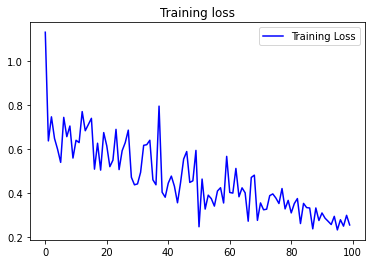

In [85]:
import matplotlib.pyplot as plt

#loss = [dicts_loss[i] for i in range(len(dicts_loss))]
epochs = range(len(losse))


plt.figure()

plt.plot(epochs, losse, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [96]:
for  i in range(31,90):
  predict(test_source_text=X_test[i+1])

A dog jumping for a Frisbee in the snow.
[[1, 32, 93, 53, 1, 425, 3, 4]]
<end>
People are conversing at a dining table under a canopy.
[[16, 13, 1145, 17, 1, 1436, 90, 201, 1]]
woman in the water <end>
A girl playing a violin along with a group of people
[[1, 28, 33, 1, 704, 131, 10, 1, 38, 9, 16]]
<end>
A woman within an orchestra is playing a violin.
[[1, 11, 1966, 18, 1409, 8, 33, 1]]
man . <end>
Three men, one holding pipes, another holding a large object above his head, and one resting against the pipe bed on the truck, are looking at the camera.
[[43, 41, 40, 67, 40, 1, 52, 424, 323, 25, 5, 41, 679, 226, 4, 1039, 457, 6, 4, 13, 49, 17, 4]]
out feet happy dressed tease dressed dressed through dressed through dressed hand pictures sets turn which down sets affection photographed
A Ford car is making a right turn as 3 males are walking across the street behind the car.
[[1, 3962, 152, 8, 261, 1, 307, 876, 47, 708, 13, 39, 196, 4, 35, 77, 4]]
a man and brown woman is attached to a du

In [97]:
import warnings
warnings.filterwarnings('ignore')
import nltk.translate.bleu_score as bleu

In [103]:
refrences = [text.split() for text in Y_test]
pred_text = predict(test_source_text=X_test[20])
translation = 'black swimming .'.split()

print('BLEU score: {}'.format(bleu.sentence_bleu(refrences, translation)))

A man standing in front of a building on the phone as two men to the side pain on the side.
[[1, 7, 29, 3, 34, 9, 1, 71, 6, 4, 380, 47, 12, 30, 14, 4, 138, 3191, 6, 4]]
<end>
BLEU score: 0.9036020036098448


# with attention

In [47]:
class LuongAttention(tf.keras.Model):
    def __init__(self, rnn_size):
        super(LuongAttention, self).__init__()
        self.wa = tf.keras.layers.Dense(rnn_size)
        
    def call(self, decoder_output, encoder_output):
        # Dot score: h_t (dot) Wa (dot) h_s
        # encoder_output shape: (batch_size, max_len, rnn_size)
        # decoder_output shape: (batch_size, 1, rnn_size)
        # score will have shape: (batch_size, 1, max_len)
        score = tf.matmul(decoder_output, self.wa(encoder_output), transpose_b=True)
        # alignment vector a_t
        alignment = tf.nn.softmax(score, axis=2)
       # context vector c_t is the average sum of encoder output
        context = tf.matmul(alignment, encoder_output)

        return context, alignment

In [48]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, rnn_size):
        super(Decoder, self).__init__()
        
        # Create a LuongAttention object
        self.attention = LuongAttention(rnn_size)

        self.rnn_size = rnn_size
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.lstm = tf.keras.layers.LSTM(rnn_size, return_sequences=True, return_state=True)
        
        self.wc = tf.keras.layers.Dense(rnn_size, activation='tanh')
        self.ws = tf.keras.layers.Dense(vocab_size)
    def call(self, sequence, state, encoder_output):
        # Remember that the input to the decoder
        # is now a batch of one-word sequences,
        # which means that its shape is (batch_size, 1)
        embed = self.embedding(sequence)
        
        # Therefore, the lstm_out has shape (batch_size, 1, rnn_size)
        lstm_out, state_h, state_c = self.lstm(embed, initial_state=state)
        # Use self.attention to compute the context and alignment vectors
        # context vector's shape: (batch_size, 1, rnn_size)
        # alignment vector's shape: (batch_size, 1, source_length)
        context, alignment = self.attention(lstm_out, encoder_output)

        # Combine the context vector and the LSTM output
        # Before combined, both have shape of (batch_size, 1, rnn_size),
        # so let's squeeze the axis 1 first
        # After combined, it will have shape of (batch_size, 2 * rnn_size)
        lstm_out = tf.concat([tf.squeeze(context, 1), tf.squeeze(lstm_out, 1)], 1)
        
        # lstm_out now has shape (batch_size, rnn_size)
        lstm_out = self.wc(lstm_out)
        
        # Finally, it is converted back to vocabulary space: (batch_size, vocab_size)
        logits = self.ws(lstm_out)

        return logits, state_h, state_c, alignment

In [55]:
def loss_func(targets, logits):
    crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True)
    mask = tf.math.logical_not(tf.math.equal(targets, 0))
    mask = tf.cast(mask, dtype=tf.int64)
    loss = crossentropy(targets, logits, sample_weight=mask)

    return loss

In [49]:
optimizer = tf.keras.optimizers.Adam()

In [59]:
encoder = Encoder(vocab_X_size, EMBEDDING_SIZE, LSTM_SIZE)
attention = LuongAttention(vocab_X_size)
decoder = Decoder(vocab_Y_size, EMBEDDING_SIZE, LSTM_SIZE)

In [60]:
@tf.function
def train_step(source_seq, target_seq_in, target_seq_out, en_initial_states):
    loss = 0
    with tf.GradientTape() as tape:
        en_outputs = encoder(source_seq, en_initial_states)
        en_states = en_outputs[1:]
        de_state_h, de_state_c = en_states
        
        # We need to create a loop to iterate through the target sequences
        for i in range(target_seq_out.shape[1]):
            # Input to the decoder must have shape of (batch_size, length)
            # so we need to expand one dimension
            decoder_in = tf.expand_dims(target_seq_in[:, i], 1)
            logit, de_state_h, de_state_c, _ = decoder(decoder_in, (de_state_h, de_state_c), en_outputs[0])
            
            # The loss is now accumulated through the whole batch
            loss += loss_func(target_seq_out[:, i], logit)

    variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, variables)
    optimizer.apply_gradients(zip(gradients, variables))

    return loss / target_seq_out.shape[1]

In [62]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [63]:
NUM_EPOCHS = 100
BATCH_SIZE = 5
losse = []
for e in range(NUM_EPOCHS):
    en_initial_states = encoder.init_states(BATCH_SIZE)

    for batch, (source_seq, target_seq_in, target_seq_out) in enumerate(dataset.take(-1)):
        loss = train_step(source_seq, target_seq_in, target_seq_out, en_initial_states)
    if (e + 1) % 50 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    loss_epoch = loss.numpy()
    print('Epoch {} Loss {:.4f}'.format(e + 1, loss_epoch))
    losse.append(loss_epoch)
    

Epoch 1 Loss 0.7341
Epoch 2 Loss 0.7999
Epoch 3 Loss 0.8243
Epoch 4 Loss 1.0515
Epoch 5 Loss 1.1128
Epoch 6 Loss 0.7211
Epoch 7 Loss 0.5716
Epoch 8 Loss 0.5761
Epoch 9 Loss 0.7380
Epoch 10 Loss 0.8938
Epoch 11 Loss 0.6679
Epoch 12 Loss 0.5595
Epoch 13 Loss 0.5686
Epoch 14 Loss 0.7109
Epoch 15 Loss 0.6687
Epoch 16 Loss 0.6270
Epoch 17 Loss 0.4933
Epoch 18 Loss 0.4794
Epoch 19 Loss 0.4772
Epoch 20 Loss 0.4179
Epoch 21 Loss 0.6074
Epoch 22 Loss 0.5753
Epoch 23 Loss 0.6571
Epoch 24 Loss 0.7314
Epoch 25 Loss 0.4571
Epoch 26 Loss 0.6120
Epoch 27 Loss 0.5168
Epoch 28 Loss 0.4879
Epoch 29 Loss 0.3628
Epoch 30 Loss 0.4856
Epoch 31 Loss 0.5497
Epoch 32 Loss 0.5306
Epoch 33 Loss 0.5681
Epoch 34 Loss 0.3832
Epoch 35 Loss 0.3927
Epoch 36 Loss 0.4717
Epoch 37 Loss 0.4353
Epoch 38 Loss 0.4307
Epoch 39 Loss 0.4450
Epoch 40 Loss 0.5972
Epoch 41 Loss 0.4945
Epoch 42 Loss 0.3788
Epoch 43 Loss 0.4013
Epoch 44 Loss 0.3657
Epoch 45 Loss 0.3793
Epoch 46 Loss 0.6439
Epoch 47 Loss 0.2866
Epoch 48 Loss 0.3977
E

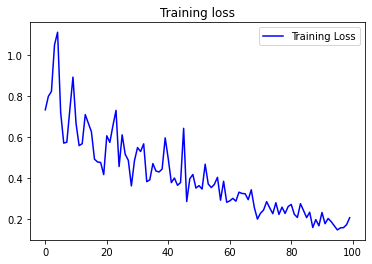

In [64]:
import matplotlib.pyplot as plt

#loss = [dicts_loss[i] for i in range(len(dicts_loss))]
epochs = range(len(losse))


plt.figure()

plt.plot(epochs, losse, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [75]:
def predict(test_source_text=None):
    #if test_source_text is None:
        #test_source_text = raw_data_en[np.random.choice(len(raw_data_en))]
    #attention_plot = np.zeros((max_length_Y_in, max_length_X))

    print(test_source_text)
    test_source_seq = tokenizer_X_train.texts_to_sequences([test_source_text])
    print(test_source_seq)

    initial_states = encoder.init_states(1)
    en_outputs = encoder(tf.constant(test_source_seq), initial_states)

    de_input = tf.constant([[tokenizer_Y_train.word_index['<start>']]])
    de_state_h, de_state_c = en_outputs[1:]
    out_words = []
    alignments = []

    while True:
        de_output, de_state_h, de_state_c, alignment = decoder(
            de_input, (de_state_h, de_state_c), en_outputs[0])
        de_input = tf.expand_dims(tf.argmax(de_output, -1), 0)
        out_words.append(tokenizer_Y_train.index_word[de_input.numpy()[0][0]])



        alignments.append(alignment.numpy())

        if out_words[-1] == '<end>' or len(out_words) >= 20:
            break

    print(' '.join(out_words))
    return np.array(alignments), test_source_text.split(' '), out_words

In [76]:
test_df = test_df[test_df["sentence2"].notnull()]
X_test = np.array(test_df["sentence1"])
Y_test = np.array(test_df["sentence2"])

In [67]:
import warnings
warnings.filterwarnings('ignore')
import nltk.translate.bleu_score as bleu

In [79]:
refrences = [text.split() for text in Y_test]
_,_,predict = predict(test_source_text=X_test[3])
translation = 'a man is outdoors .'.split()

print('BLEU score: {}'.format(bleu.sentence_bleu(refrences, translation)))

A statue at a museum that no seems to be looking at.
[[1, 498, 17, 1, 1138, 88, 500, 862, 14, 189, 49]]
a man in stage a man outside . <end>
BLEU score: 0.7952707287670506


In [78]:
predict(test_source_text=X_test[3])

A statue at a museum that no seems to be looking at.
[[1, 498, 17, 1, 1138, 88, 500, 862, 14, 189, 49]]
a man in stage a man outside . <end>


(array([[[[5.14401458e-02, 2.16315955e-01, 9.16597471e-02,
           1.14044964e-01, 1.17540464e-01, 7.83840045e-02,
           7.86049739e-02, 7.37819150e-02, 8.17610249e-02,
           3.02482136e-02, 6.62185624e-02]]],
 
 
        [[[2.03086257e-01, 1.83372032e-02, 9.04381126e-02,
           7.82199129e-02, 6.72446787e-02, 1.02281682e-01,
           9.23328698e-02, 7.79198408e-02, 6.99840412e-02,
           1.20446876e-01, 7.97084644e-02]]],
 
 
        [[[1.80384144e-01, 7.05359317e-03, 7.31026232e-02,
           6.04114309e-02, 4.80495952e-02, 8.82227942e-02,
           8.26255754e-02, 7.50959888e-02, 6.72862902e-02,
           2.17105612e-01, 1.00662380e-01]]],
 
 
        [[[2.37285465e-01, 7.27767646e-02, 1.73619017e-01,
           1.06141038e-01, 5.18108755e-02, 6.24304079e-02,
           4.11039777e-02, 3.48170847e-02, 5.12464643e-02,
           2.93957163e-02, 1.39373139e-01]]],
 
 
        [[[3.63292933e-01, 4.10160199e-02, 3.11515301e-01,
           1.85708180e-01, 3.4754